In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables# Use Pandas to calcualte the summary statistics for the precipitation data 
Base.prepare(engine, reflect=True)

In [6]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
 # Create our session (link) from Python to the DB
session = Session(engine)

## Exploratory Climate Analysis

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

year_date = dt.date(2017, 8, 23) - dt.timedelta(days= 365)


In [10]:
Measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [11]:
# Perform a query to retrieve the data and precipitation scores
data_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_date).all()
for data in data_query:
    print(data)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-05-03', 0.0)
('2017-05-04', 0.0)
('2017-05-05', 0.0)
('2017-05-06', 0.0)
('2017-05-07', 0.0)
('2017-05-08', 0.0)
('2017-05-09', 0.68)
('2017-05-10', 0.06)
('2017-05-11', 0.0)
('2017-05-12', 0.0)
('2017-05-13', 0.0)
('2017-05-14', 0.0)
('2017-05-15', 0.06)
('2017-05-16', 0.0)
('2017-05-17', 0.0)
('2017-05-18', 0.46)
('2017-05-20', None)
('2017-05-21', 0.0)
('2017-05-22', 0.0)
('2017-05-23', 0.0)
('2017-05-24', 0.61)
('2017-05-25', 0.55)
('2017-05-26', 0.0)
('2017-05-27', 0.0)
('2017-05-28', 0.0)
('2017-05-29', 0.0)
('2017-05-30', 0.11)
('2017-05-31', 0.0)
('2017-06-01', 0.0)
('2017-06-02', 0.0)
('2017-06-03', 0.15)
('2017-06-04', 0.0)
('2017-06-05', 0.0)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.0)
('2017-06-09', 0.0)
('2017-06-10', 0.13)
('2017-06-11', 0.25)
('2017-06-12', 0.14)
('2017-06-13', 0.03)
('2017-06-14', 0.06)
('2017-06-15', 0.0)
('2017-06-16', 0.0)
('2017-06-17', 0.0)
('2017-06-18', 0.0)
('2017-06-19', 0.01)
('2017-06-21', None)
('2017-06-22', 0.0)
('20

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
query_df = pd.DataFrame(data_query, columns= ['Date', "Precipitation"])
query_df.set_index("Date", inplace=True)
# Sort the dataframe by date
query_df = query_df.sort_values(["Date"]).dropna()
query_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


AttributeError: 'Line2D' object has no property 'ylabel'

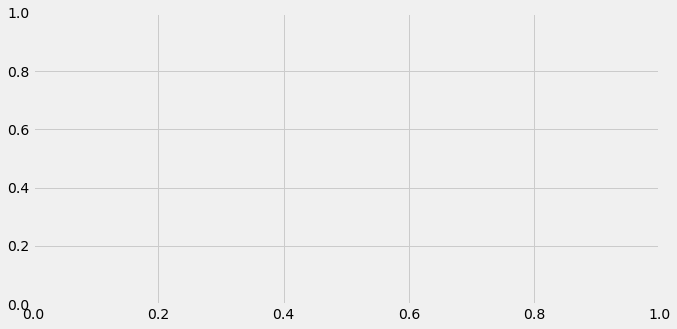

In [35]:
query_df.plot(figsize=(10,5), rot=90, ylabel="Inches")
plt.savefig("precipitationgraph.png")
plt.show()

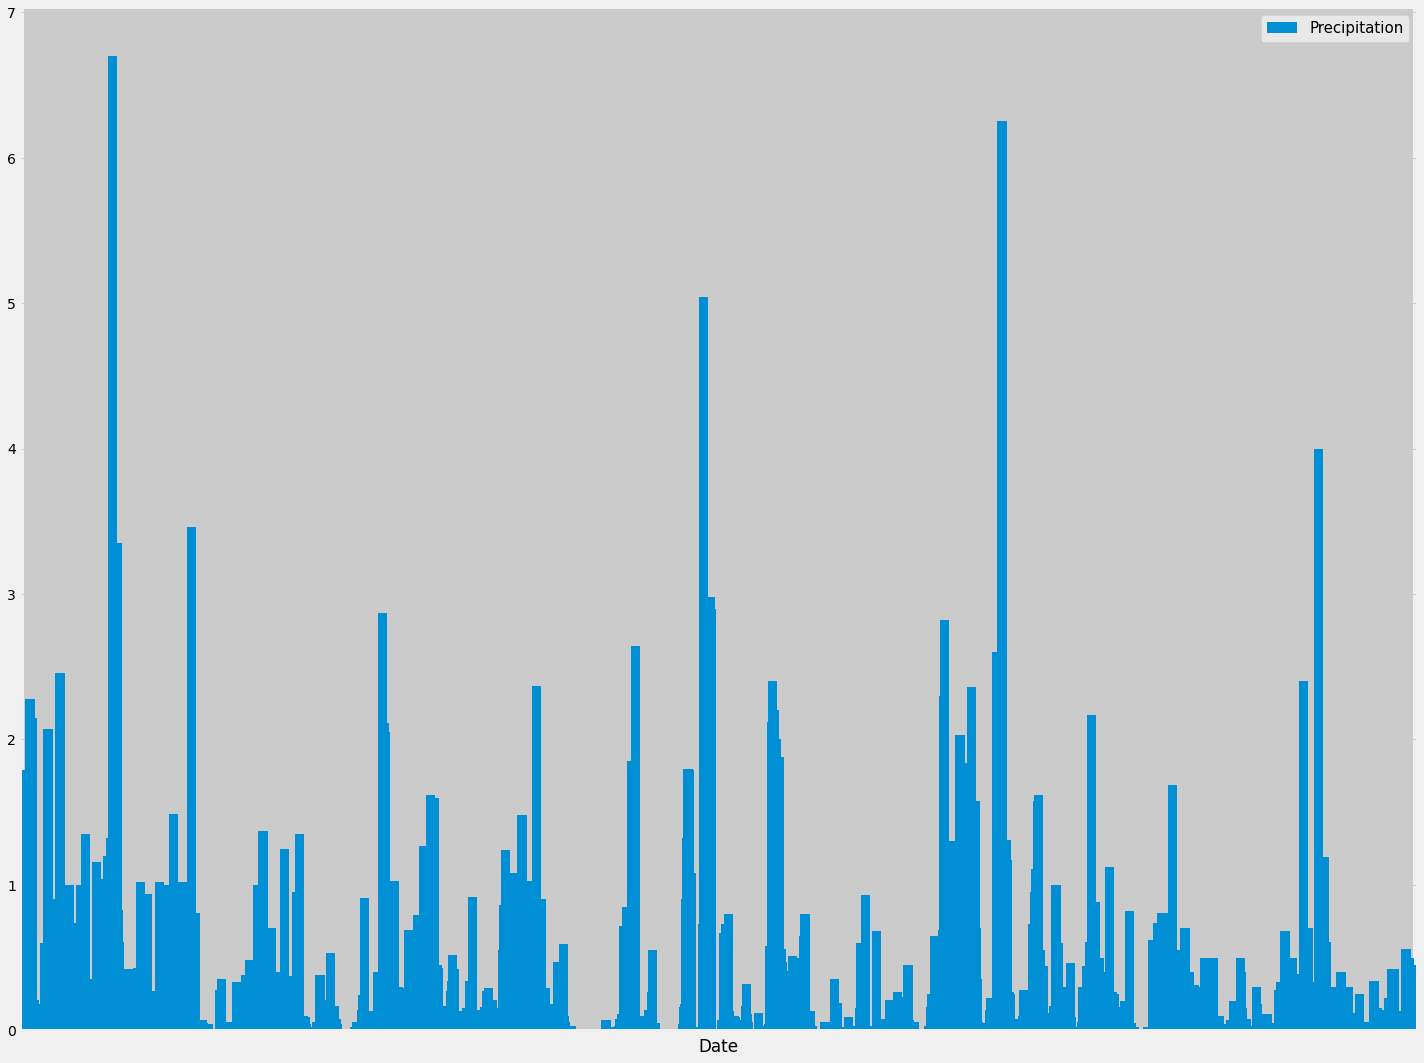

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
fig = query_df.plot(kind='bar', figsize=(20,15), width=15)
fig.set_xlabel("Date")
fig.set_xticklabels([])
fig.set_ylabel("Inches")
plt.legend(['Precipitation'], fontsize=15)
plt.tight_layout()
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data 

In [15]:
# Design a query to show how many stations are available in this dataset?

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram